In [23]:
!pip install tensorflow keras matplotlib

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [25]:
!wget https://github.com/chandrikadeb7/Face-Mask-Detection/archive/refs/heads/master.zip
!unzip master.zip > /dev/null


--2025-11-05 16:27:53--  https://github.com/chandrikadeb7/Face-Mask-Detection/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/chandrikadeb7/Face-Mask-Detection/zip/refs/heads/master [following]
--2025-11-05 16:27:53--  https://codeload.github.com/chandrikadeb7/Face-Mask-Detection/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip.4’

master.zip.4            [  <=>               ] 190.46M  25.9MB/s    in 7.3s    

2025-11-05 16:28:01 (26.1 MB/s) - ‘master.zip.4’ saved [199714088]

replace Face-Mask-Detection-master/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [26]:
dataset_dir = '/content/Face-Mask-Detection-master/dataset'


In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,     # 80% train, 20% validation
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

test_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 3274 images belonging to 2 classes.
Found 818 images belonging to 2 classes.


In [28]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
history = model.fit(train_gen, validation_data=test_gen, epochs=5)


Epoch 1/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.6445 - loss: 0.6953 - val_accuracy: 0.9413 - val_loss: 0.1985
Epoch 2/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.9043 - loss: 0.2647 - val_accuracy: 0.9340 - val_loss: 0.1955
Epoch 3/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.8984 - loss: 0.2432 - val_accuracy: 0.9572 - val_loss: 0.1337
Epoch 4/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.9249 - loss: 0.1943 - val_accuracy: 0.9499 - val_loss: 0.1476
Epoch 5/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.9267 - loss: 0.1834 - val_accuracy: 0.9523 - val_loss: 0.1082


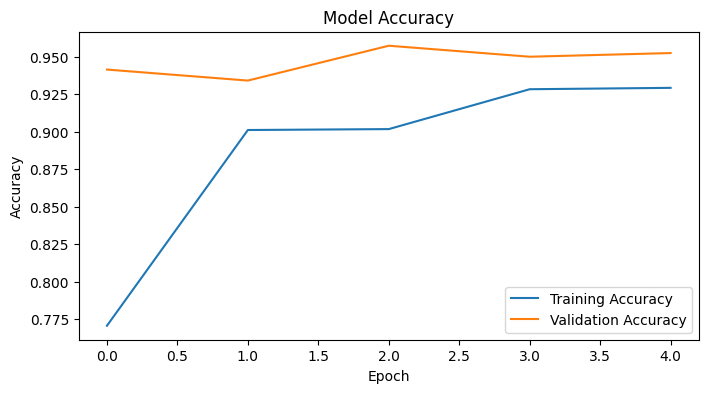

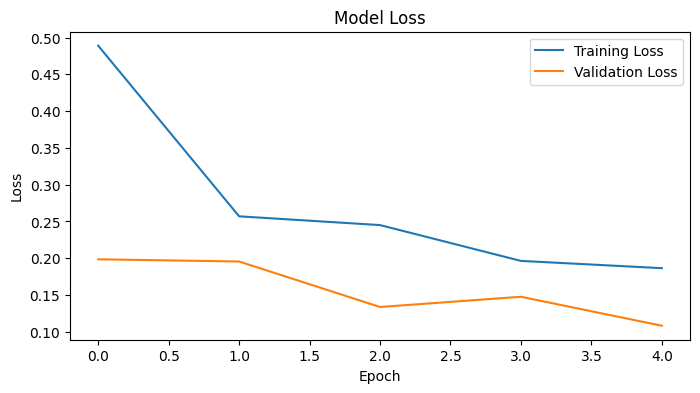

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


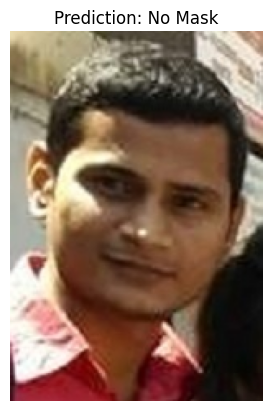

In [31]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Pick one random image from the dataset
img_path = '/content/Face-Mask-Detection-master/dataset/without_mask/1.jpg'

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
label = "Mask" if prediction[0][0] < 0.5 else "No Mask"

plt.imshow(image.load_img(img_path))
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()
